In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

state_name = 'NY'

df_weekly_all = pd.read_csv("Zillow_Weekly_MedianSalesPrice_Raw.csv")
df_weekly_all = df_weekly_all[df_weekly_all.StateName == state_name]
df_weekly_all.drop(['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'RegionType'], axis=1, inplace=True)
df_weekly_all.head()
df_weekly_all = pd.melt(df_weekly_all.dropna(axis=1), var_name='Date', value_name='MedianSalesPrice')
df_weekly_all.Date = pd.to_datetime(df_weekly_all.Date)
min_index_2020 = df_weekly_all.loc[df_weekly_all.Date == df_weekly_all[df_weekly_all.Date.dt.year == 2020].Date.min()].index[0]
print ('Total Weeks: ' + str(df_weekly_all.shape[0]))
print ('Total Years of Data: ' + str(np.round(df_weekly_all.shape[0]/52, 2)))
from sklearn.preprocessing import MinMaxScaler

Total Weeks: 514
Total Years of Data: 9.88


In [2]:
# data prep

df_weekly_all.index = df_weekly_all.Date
df_weekly_all.drop('Date', axis=1, inplace=True)

In [3]:
for state_name in ['NY', 'CA', 'WA', 'CO']:

    df_weekly_all = pd.read_csv("Zillow_Weekly_MedianSalesPrice_Raw.csv")
    df_weekly_all = df_weekly_all[df_weekly_all.StateName == state_name]
    df_weekly_all.drop(['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'RegionType'], axis=1, inplace=True)
    df_weekly_all.head()
    df_weekly_all = pd.melt(df_weekly_all.dropna(axis=1), var_name='Date', value_name='MedianSalesPrice')
    df_weekly_all.Date = pd.to_datetime(df_weekly_all.Date)
    print ("state name: " + str(state_name))
    print ('Total Weeks: ' + str(df_weekly_all.shape[0]))
    print ('Total Years of Data: ' + str(np.round(df_weekly_all.shape[0]/52, 2)))

    min_index_2020 = df_weekly_all.loc[df_weekly_all.Date == df_weekly_all[df_weekly_all.Date.dt.year == 2020].Date.min()].index[0]
    print ("Years of Data: " + str(df_weekly_all[:min_index_2020].shape[0]/52))
    print (" ")

state name: NY
Total Weeks: 514
Total Years of Data: 9.88
Years of Data: 9.23076923076923
 
state name: CA
Total Weeks: 656
Total Years of Data: 12.62
Years of Data: 11.961538461538462
 
state name: WA
Total Weeks: 656
Total Years of Data: 12.62
Years of Data: 11.961538461538462
 
state name: CO
Total Weeks: 656
Total Years of Data: 12.62
Years of Data: 11.961538461538462
 


In [4]:
# playing around with inputs and outputs for years of training size + time steps

year_var = 2
n_output = 3
additional = 0
if n_output == 3:
    additional = 1
if n_output == 5:
    additional = 2

print (df_weekly_all[-(year_var * 52 + n_output) + additional:-n_output].shape)
print (df_weekly_all[-n_output:].shape)

(103, 2)
(3, 2)


In [5]:
# df_weekly_all[-(year_var * 52 + n_output):480].shape[0]//n_output

In [6]:
# df_weekly_all[480:-n_output]

In [7]:
year_var = 2
n_output = 3
additional = 0
if n_output == 4:
    additional = 1
if n_output == 3:
    additional = 1
if n_output == 5:
    additional = 2

train, test = df_weekly_all[min_index_2020-(year_var * 52 +n_output - (year_var%3)): min_index_2020], df_weekly_all[min_index_2020:-(n_output + (year_var%3))]
print (train.shape, test.shape)

(105, 2) (29, 2)


In [8]:
df_weekly_all[min_index_2020-(year_var * 52 +n_output - (year_var%3)): min_index_2020].shape

(105, 2)

In [9]:
counter = 104
initial_counter = 104
while (counter % 2 != 0):
    counter = counter + 1 
print (counter)
print (counter - initial_counter)

104
0


In [10]:
def grab_appropriate_backshift(tstep, yr):
    counter = 52*yr
    initial_counter = 52*yr
    while (counter % tstep != 0):
        counter = counter + 1
    return (counter - initial_counter)

In [11]:
grab_appropriate_backshift(5, 3)

4

In [12]:
tstep = 6
yr = 1
print ((yr * 52.0) / tstep)

8.666666666666666


In [13]:
(3*52)/5

31.2

In [14]:
df_weekly_all[df_weekly_all.shape[0] - 10*tstep - (52 * yr)-4:-10 * tstep].shape

(56, 2)

In [15]:
54/6.0

9.0

In [16]:
print (df_weekly_all[df_weekly_all.shape[0] - 10*tstep - (52 * yr) - grab_appropriate_backshift(tstep, yr):-10 * tstep].shape)
df_weekly_all[df_weekly_all.shape[0] - 10*tstep - (52 * yr) - grab_appropriate_backshift(tstep, yr):-10 * tstep]

(54, 2)


,Date,MedianSalesPrice
542,2018-06-23,430000.0
543,2018-06-30,425167.0
544,2018-07-07,420000.0
545,2018-07-14,425000.0
546,2018-07-21,414950.0
547,2018-07-28,426000.0
548,2018-08-04,422630.0
549,2018-08-11,410000.0
550,2018-08-18,412953.0
551,2018-08-25,402000.0


In [17]:
print (df_weekly_all[-10 * tstep:].shape)
df_weekly_all[-10 * tstep:]

(60, 2)


,Date,MedianSalesPrice
596,2019-07-06,430000.0
597,2019-07-13,430653.0
598,2019-07-20,435000.0
599,2019-07-27,435000.0
600,2019-08-03,432500.0
601,2019-08-10,437000.0
602,2019-08-17,430000.0
603,2019-08-24,419000.0
604,2019-08-31,420000.0
605,2019-09-07,425000.0


In [18]:
# def split_dataset(data, n_output, year_var, additional, min_index):
#     # split into standard weeks
#     train, test = data[-(year_var * 52 + n_output - additional):min_index], data[min_index:-n_output - additional:]
#     print (train.shape, test.shape)
#     # restructure into windows of weekly data
#     train = array(split(train, len(train)/n_output))
#     test = array(split(test, len(test)/n_output))
#     return train, test

In [19]:
# data = df_weekly_all

In [20]:
year_var = 2
n_output = 3
additional = 0
if n_output == 3:
    additional = 1
if n_output == 5:
    additional = 2


train, test = split_dataset(data.values, 3, 2, additional, min_index_2020)

NameError: name 'split_dataset' is not defined

In [21]:
# train[0]

In [22]:
# test[0]

In [ ]:


# np.split(data[-(year_var * 52 + n_output - additional):min_index_2020], 72/3)

In [ ]:
# data[1:-328], data[-328:-6]

In [ ]:
# 2,3
# 3, 3
#5, 3
#6, 3
# 8,3
# 9, 3

In [ ]:
# for time_step in range(5, 6):
#     for yr in range(1, 10):
#         additional = 0
#         if time_step == 3 and yr == 2:
#             additional = 2
#         elif time_step == 3 and yr == 3:
#             additional = 3
#         elif time_step == 3 and yr == 5:
#             additional = 2
#         elif time_step == 3 and yr == 6:
#             additional = 3
#         elif time_step == 3 and yr == 8:
#             additional = 2
#         elif time_step == 3 and yr == 9:
#             additional = 3
#         elif time_step == 3:
#             additional = 1
#         elif time_step == 5 and yr == 1:
#             additional = 2
#         elif time_step == 5 and yr == 2:
#             additional = 4
#         elif time_step == 5 and yr == 3:
#             additional = 1
#         elif time_step == 5 and yr == 4:
#             additional = 3
#         elif time_step == 5 and yr == 6:
#             additional = 2
#         elif time_step == 5 and yr == 7:
#             additional = 4
#         elif time_step == 5 and yr == 8:
#             additional = 6
#         elif time_step == 5 and yr == 9:
#             additional = 3
#             #(time_stp % yr) + 1
#         print (yr, time_step)
#         print (df_weekly_all[-(yr * 52 + time_step) + additional:-time_step].shape[0])
#         print (df_weekly_all[-(yr * 52 + time_step) + additional:-time_step].shape[0]/time_step)
#         print (" ")

In [ ]:
# np.array(np.split(df_weekly_all[-(year_var * 52 + n_output) + additional:-n_output], 104/2))

In [ ]:
# df_weekly_all[-n_output:]

In [ ]:
# 1 timestep --> no change
# 2 timesteps --> no change
# 3 timesteps --> -1

In [23]:
# univariate multi-step encoder-decoder lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
 
# def split_dataset(data, n_output, year_var, additional, min_index):
#     # split into standard weeks
#     train, test = data[-(year_var * 52 + n_output - additional):min_index], data[min_index:-n_output - additional:]
#     print (train.shape, test.shape)
#     # restructure into windows of weekly data
#     train = array(split(train, len(train)/n_output))
#     test = array(split(test, len(test)/n_output))
#     return train, test

def split_dataset(data, n_output, year_var):
    # split into standard weeks
    #train, test = data[-(year_var * 52 + n_output) + additional:-n_output], data[-n_output:]
    train, test = data[data.shape[0] - 10*n_output - (52 * year_var) - grab_appropriate_backshift(n_output, year_var):-10 * n_output], data[-10 * n_output:]
#     print (train.shape, test.shape)
    # restructure into windows of weekly data
    train = array(split(train, len(train)/n_output))
    test = array(split(test, len(test)/n_output))
#     print (train.shape, test.shape)
    return train, test
 
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
#     print (actual.shape, predicted.shape)
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores
 
# summarize scores
def summarize_scores(name, score, scores):
	s_scores = ', '.join(['%.1f' % s for s in scores])
	print('%s: [%.3f] %s' % (name, score, s_scores))
 
# convert history into inputs and outputs
def to_supervised(train, n_input, n_out):
	# flatten data
	data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
	X, y = list(), list()
	in_start = 0
	# step over the entire history one time step at a time
	for _ in range(len(data)):
		# define the end of the input sequence
		in_end = in_start + n_input
		out_end = in_end + n_out
		# ensure we have enough data for this instance
		if out_end <= len(data):
			x_input = data[in_start:in_end, 0]
			x_input = x_input.reshape((len(x_input), 1))
			X.append(x_input)
			y.append(data[in_end:out_end, 0])
		# move along one time step
		in_start += 1
	return array(X), array(y)
 
# train the model
def build_model(train, n_input, output, epochs, encoder_units, decoder_units):
	# prepare data
	train_x, train_y = to_supervised(train, n_input, output)
	# define parameters
	verbose, epochs, batch_size = 0, epochs, 16
	n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[2], train_y.shape[1]
	# reshape output into [samples, timesteps, features]
	train_y = train_y.reshape((train_y.shape[0], train_y.shape[1], 1))
	# define model
	model = Sequential()
	model.add(LSTM(encoder_units, activation='relu', input_shape=(n_timesteps, n_features)))
	model.add(RepeatVector(n_outputs))
	model.add(LSTM(decoder_units, activation='relu', return_sequences=True))
	model.add(TimeDistributed(Dense(100, activation='relu')))
	model.add(TimeDistributed(Dense(1)))
	model.compile(loss='mse', optimizer='adam')
	# fit network
	model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=verbose)
	return model
 
# make a forecast
def forecast(model, history, n_input):
	# flatten data
	data = array(history)
	data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
	# retrieve last observations for input data
	input_x = data[-n_input:, 0]
	# reshape into [1, n_input, 1]
	input_x = input_x.reshape((1, len(input_x), 1))
	# forecast the next week
	yhat = model.predict(input_x, verbose=0)
	# we only want the vector forecast
	yhat = yhat[0]
	return yhat
 
# evaluate a single model
def evaluate_model(train, test, n_input, output, epochs, encoder_units, decoder_units):
    # fit model
    model = build_model(train, n_input, output, epochs, encoder_units, decoder_units)
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = forecast(model, history, n_input)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    # evaluate predictions days for each week
    predictions = array(predictions)
#     print (predictions.shape)
#     print (test.shape)
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores
 
# load the new file
# dataset = df_weekly_all
# split into train and test

year_var = 3
n_output = 5
n_input = 5

# train, test = split_dataset(dataset.values, n_output, year_var)
# # evaluate model and get scores

# # scaler = StandardScaler()
# # X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
# # X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
# print (train.shape)
# scaler = MinMaxScaler()
# train = scaler.fit_transform(train.reshape(-1, train.shape[-1])).reshape(train.shape)
# test = scaler.transform(test.reshape(-1, test.shape[-1])).reshape(test.shape)
# print (train.shape)
# # train = scaler.fit_transform(train)
# # test = scaler.transform(test)
# # # n_input = 5
# score, scores = evaluate_model(train, test, n_input, n_output)
# # # summarize scores
# summarize_scores('lstm', score, scores)

In [ ]:
len(per_timestep_dict[1])

In [52]:
def create_per_timestep_dict(key_one_length, key_two_length):
    per_timestep_dict = {}
    for time_step in range(1, key_one_length + 1):
        timestep_dict = {}
        for yr in range(1, key_two_length + 1):
            timestep_dict[yr] = 0
        per_timestep_dict[time_step] = timestep_dict
    return per_timestep_dict

def convert_dict_to_year_dict(per_timestep_dict):
    per_year_dict = create_per_timestep_dict(len(per_timestep_dict[1]), len(per_timestep_dict))
    for timestep in per_timestep_dict.keys():
        for yr_i in range(0, len(per_timestep_dict[key].values())):
            per_year_dict[yr_i + 1][timestep] = list(per_timestep_dict[timestep].values())[yr_i]
    return per_year_dict

# New York City

Total Weeks: 514
Total Years of Data: 9.88
NY year: 1 timestep: 1
lstm: [0.343] 0.3
 
NY year: 2 timestep: 1
lstm: [0.181] 0.2
 
NY year: 3 timestep: 1
lstm: [0.100] 0.1
 
NY year: 4 timestep: 1
lstm: [0.146] 0.1
 
NY year: 5 timestep: 1
lstm: [0.134] 0.1
 
NY year: 6 timestep: 1
lstm: [0.096] 0.1
 
NY year: 7 timestep: 1
lstm: [0.099] 0.1
 
NY year: 8 timestep: 1
lstm: [0.052] 0.1
 
 
NY year: 1 timestep: 2
lstm: [0.298] 0.3, 0.2
 
NY year: 2 timestep: 2
lstm: [0.178] 0.2, 0.2
 
NY year: 3 timestep: 2
lstm: [0.123] 0.1, 0.1
 
NY year: 4 timestep: 2
lstm: [0.142] 0.1, 0.2
 
NY year: 5 timestep: 2
lstm: [0.116] 0.1, 0.1
 
NY year: 6 timestep: 2
lstm: [0.084] 0.1, 0.1
 
NY year: 7 timestep: 2
lstm: [0.088] 0.1, 0.1
 
NY year: 8 timestep: 2
lstm: [0.075] 0.1, 0.1
 
 
NY year: 1 timestep: 3
lstm: [0.199] 0.3, 0.2, 0.2
 
NY year: 2 timestep: 3
lstm: [0.147] 0.1, 0.1, 0.2
 
NY year: 3 timestep: 3
lstm: [0.159] 0.1, 0.1, 0.2
 
NY year: 4 timestep: 3
lstm: [0.124] 0.1, 0.1, 0.1
 
NY year: 5 ti

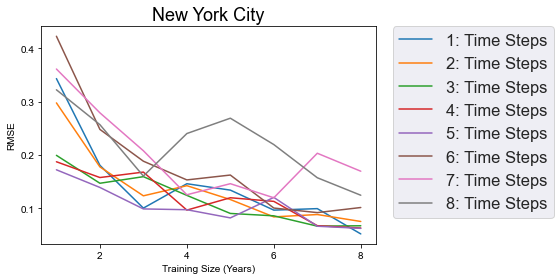

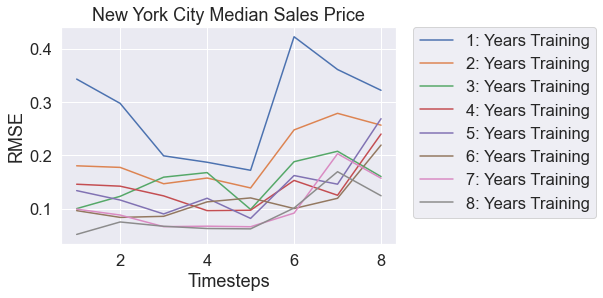

In [53]:
state_name = 'NY'

df_weekly_all = pd.read_csv("Zillow_Weekly_MedianSalesPrice_Raw.csv")
df_weekly_all = df_weekly_all[df_weekly_all.StateName == state_name]
df_weekly_all.drop(['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'RegionType'], axis=1, inplace=True)
df_weekly_all.head()
df_weekly_all = pd.melt(df_weekly_all.dropna(axis=1), var_name='Date', value_name='MedianSalesPrice')
df_weekly_all.Date = pd.to_datetime(df_weekly_all.Date)
min_index_2020 = df_weekly_all.loc[df_weekly_all.Date == df_weekly_all[df_weekly_all.Date.dt.year == 2020].Date.min()].index[0]
print ('Total Weeks: ' + str(df_weekly_all.shape[0]))
print ('Total Years of Data: ' + str(np.round(df_weekly_all.shape[0]/52, 2)))

# data prep

df_weekly_all.index = df_weekly_all.Date
df_weekly_all.drop('Date', axis=1, inplace=True)

n_input = 8
dataset = df_weekly_all
per_timestep_dict = create_per_timestep_dict(8, 8)

for time_step in range(1, 9):
    for yr in range(1, 9):
        n_input = 8
        print (state_name, "year:", yr, "timestep:", time_step)
        train, test = split_dataset(dataset.values, time_step, yr)
        scaler = MinMaxScaler()
        train = scaler.fit_transform(train.reshape(-1, train.shape[-1])).reshape(train.shape)
        test = scaler.transform(test.reshape(-1, test.shape[-1])).reshape(test.shape)
#         print (train.shape, test.shape)
        score, scores = evaluate_model(train, test, n_input, time_step, 20, 200, 200)
        summarize_scores('lstm', score, scores)
        per_timestep_dict[time_step][yr] = score
        print (" ")
    print (" ")

fig, axs = plt.subplots()
sns.set(font_scale=1.5)
for key in per_timestep_dict.keys():
    sns.lineplot(x=range(1, 9), y=list(per_timestep_dict[key].values()), ax=axs, label=str(key) + ": Time Steps")
axs.set(xlabel='Training Size (Years)', ylabel='RMSE', title='New York City')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

per_year_dict = convert_dict_to_year_dict(per_timestep_dict)

fig, axs = plt.subplots()
sns.set(font_scale=1.5)
for key in per_year_dict.keys():
    sns.lineplot(x=range(1, 9), y=list(per_year_dict[key].values()), ax=axs, label=str(key) + ": Years Training")
axs.set(xlabel='Timesteps', ylabel='RMSE', title='New York City Median Sales Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

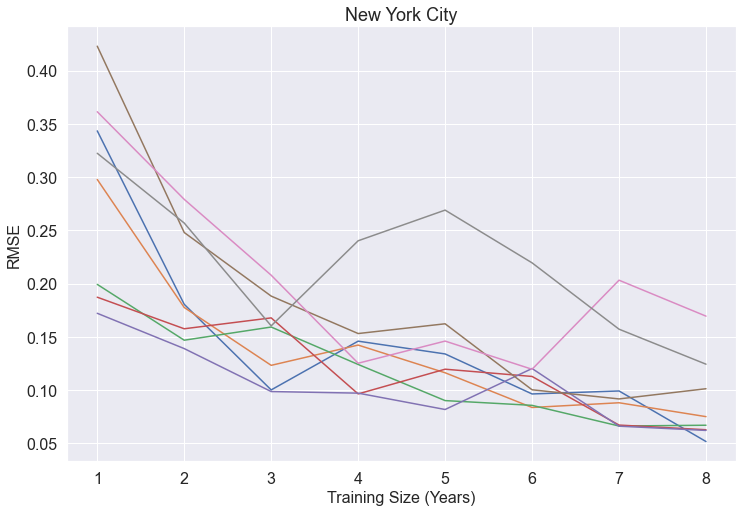

In [54]:
plt.figure(figsize=(12,8))

for key in per_timestep_dict.keys():
    plt.plot(range(1, 9), list(per_timestep_dict[key].values()), label='Predicted Time Step = {} (Weeks)'.format(str(key)))

# plt.plot(range(1, 9), list(per_year_dict[key].values(), label = 'Predicted {} (Weeks)'.format(ny_data.columns[i]))
  
         
plt.title('New York City', fontsize = 18)
plt.xlabel('Training Size (Years)', fontsize = 16);
plt.ylabel('RMSE', fontsize = 16); 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)


# Denver

Total Weeks: 656
Total Years of Data: 12.62
CO year: 1 timestep: 1
lstm: [0.321] 0.3
 
CO year: 2 timestep: 1
lstm: [0.161] 0.2
 
CO year: 3 timestep: 1
lstm: [0.090] 0.1
 
CO year: 4 timestep: 1
lstm: [0.140] 0.1
 
CO year: 5 timestep: 1
lstm: [0.055] 0.1
 
CO year: 6 timestep: 1
lstm: [0.056] 0.1
 
CO year: 7 timestep: 1
lstm: [0.068] 0.1
 
CO year: 8 timestep: 1
lstm: [0.044] 0.0
 
CO year: 9 timestep: 1
lstm: [0.022] 0.0
 
 
CO year: 1 timestep: 2
lstm: [0.412] 0.5, 0.4
 
CO year: 2 timestep: 2
lstm: [0.142] 0.1, 0.2
 
CO year: 3 timestep: 2
lstm: [0.094] 0.1, 0.1
 
CO year: 4 timestep: 2
lstm: [0.125] 0.1, 0.1
 
CO year: 5 timestep: 2
lstm: [0.055] 0.0, 0.1
 
CO year: 6 timestep: 2
lstm: [0.057] 0.0, 0.1
 
CO year: 7 timestep: 2
lstm: [0.042] 0.0, 0.0
 
CO year: 8 timestep: 2
lstm: [0.044] 0.0, 0.0
 
CO year: 9 timestep: 2
lstm: [0.038] 0.0, 0.0
 
 
CO year: 1 timestep: 3
lstm: [0.419] 0.5, 0.4, 0.3
 
CO year: 2 timestep: 3
lstm: [0.264] 0.2, 0.3, 0.3
 
CO year: 3 timestep: 3
lstm

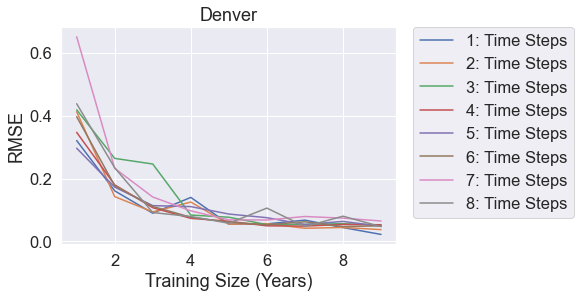

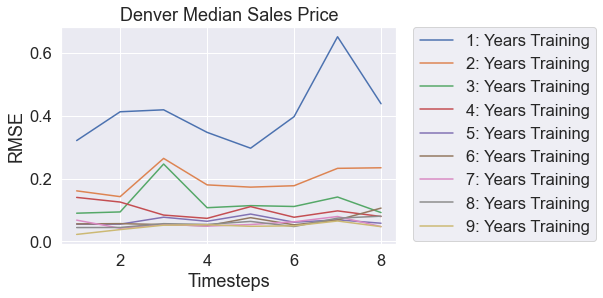

In [55]:
state_name = 'CO'

df_weekly_all = pd.read_csv("Zillow_Weekly_MedianSalesPrice_Raw.csv")
df_weekly_all = df_weekly_all[df_weekly_all.StateName == state_name]
df_weekly_all.drop(['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'RegionType'], axis=1, inplace=True)
df_weekly_all.head()
df_weekly_all = pd.melt(df_weekly_all.dropna(axis=1), var_name='Date', value_name='MedianSalesPrice')
df_weekly_all.Date = pd.to_datetime(df_weekly_all.Date)
min_index_2020 = df_weekly_all.loc[df_weekly_all.Date == df_weekly_all[df_weekly_all.Date.dt.year == 2020].Date.min()].index[0]
print ('Total Weeks: ' + str(df_weekly_all.shape[0]))
print ('Total Years of Data: ' + str(np.round(df_weekly_all.shape[0]/52, 2)))

# data prep

df_weekly_all.index = df_weekly_all.Date
df_weekly_all.drop('Date', axis=1, inplace=True)

n_input = 8
dataset = df_weekly_all
per_timestep_dict = create_per_timestep_dict(8, 9)

for time_step in range(1, 9):
    for yr in range(1, 10):
        n_input = 8
        print (state_name, "year:", yr, "timestep:", time_step)
        train, test = split_dataset(dataset.values, time_step, yr)
        scaler = MinMaxScaler()
        train = scaler.fit_transform(train.reshape(-1, train.shape[-1])).reshape(train.shape)
        test = scaler.transform(test.reshape(-1, test.shape[-1])).reshape(test.shape)
#         print (train.shape, test.shape)
        score, scores = evaluate_model(train, test, n_input, time_step, 20, 200, 200)
        summarize_scores('lstm', score, scores)
        per_timestep_dict[time_step][yr] = score
        print (" ")
    print (" ")

fig, axs = plt.subplots()
sns.set(font_scale=1.5)
for key in per_timestep_dict.keys():
    sns.lineplot(x=range(1, 10), y=list(per_timestep_dict[key].values()), ax=axs, label=str(key) + ": Time Steps")
axs.set(xlabel='Training Size (Years)', ylabel='RMSE', title='Denver')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

per_year_dict = convert_dict_to_year_dict(per_timestep_dict)

fig, axs = plt.subplots()
sns.set(font_scale=1.5)
for key in per_year_dict.keys():
    sns.lineplot(x=range(1, 9), y=list(per_year_dict[key].values()), ax=axs, label=str(key) + ": Years Training")
axs.set(xlabel='Timesteps', ylabel='RMSE', title='Denver Median Sales Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
# per_year_dict

(array([-0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

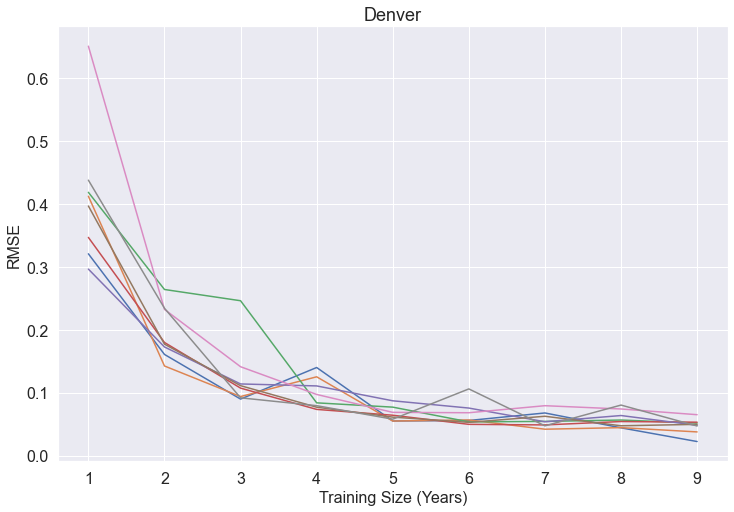

In [56]:
plt.figure(figsize=(12,8))

for key in per_timestep_dict.keys():
    plt.plot(range(1, 10), list(per_timestep_dict[key].values()), label='Predicted Time Step = {} (Weeks)'.format(str(key)))

# plt.plot(range(1, 9), list(per_year_dict[key].values(), label = 'Predicted {} (Weeks)'.format(ny_data.columns[i]))
  
         
plt.title('Denver', fontsize = 18)
plt.xlabel('Training Size (Years)', fontsize = 16);
plt.ylabel('RMSE', fontsize = 16); 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.legend()
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)


# Seattle

In [ ]:
state_name = 'WA'

df_weekly_all = pd.read_csv("Zillow_Weekly_MedianSalesPrice_Raw.csv")
df_weekly_all = df_weekly_all[df_weekly_all.StateName == state_name]
df_weekly_all.drop(['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'RegionType'], axis=1, inplace=True)
df_weekly_all.head()
df_weekly_all = pd.melt(df_weekly_all.dropna(axis=1), var_name='Date', value_name='MedianSalesPrice')
df_weekly_all.Date = pd.to_datetime(df_weekly_all.Date)
min_index_2020 = df_weekly_all.loc[df_weekly_all.Date == df_weekly_all[df_weekly_all.Date.dt.year == 2020].Date.min()].index[0]
print ('Total Weeks: ' + str(df_weekly_all.shape[0]))
print ('Total Years of Data: ' + str(np.round(df_weekly_all.shape[0]/52, 2)))

# data prep

df_weekly_all.index = df_weekly_all.Date
df_weekly_all.drop('Date', axis=1, inplace=True)

n_input = 8
dataset = df_weekly_all
per_timestep_dict = create_per_timestep_dict(8, 9)

for time_step in range(1, 9):
    for yr in range(1, 10):
        n_input = 8
        print (state_name, "year:", yr, "timestep:", time_step)
        train, test = split_dataset(dataset.values, time_step, yr)
        scaler = MinMaxScaler()
        train = scaler.fit_transform(train.reshape(-1, train.shape[-1])).reshape(train.shape)
        test = scaler.transform(test.reshape(-1, test.shape[-1])).reshape(test.shape)
#         print (train.shape, test.shape)
        score, scores = evaluate_model(train, test, n_input, time_step, 20, 200, 200)
        summarize_scores('lstm', score, scores)
        per_timestep_dict[time_step][yr] = score
        print (" ")
    print (" ")

fig, axs = plt.subplots()
sns.set(font_scale=1.5)
for key in per_timestep_dict.keys():
    sns.lineplot(x=range(1, 10), y=list(per_timestep_dict[key].values()), ax=axs, label=str(key) + ": Time Steps")
axs.set(xlabel='Training Size (Years)', ylabel='RMSE', title= 'Seattle')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

per_year_dict = convert_dict_to_year_dict(per_timestep_dict)

fig, axs = plt.subplots()
sns.set(font_scale=1.5)
for key in per_year_dict.keys():
    sns.lineplot(x=range(1, 9), y=list(per_year_dict[key].values()), ax=axs, label=str(key) + ": Years Training")
axs.set(xlabel='Timesteps', ylabel='RMSE', title='Seatte Median Sales Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Total Weeks: 656
Total Years of Data: 12.62
WA year: 1 timestep: 1
lstm: [0.360] 0.4
 
WA year: 2 timestep: 1
lstm: [0.232] 0.2
 
WA year: 3 timestep: 1


In [ ]:
plt.figure(figsize=(12,8))

for key in per_timestep_dict.keys():
    plt.plot(range(1, 10), list(per_timestep_dict[key].values()), label='Predicted Time Step = {} (Weeks)'.format(str(key)))

# plt.plot(range(1, 9), list(per_year_dict[key].values(), label = 'Predicted {} (Weeks)'.format(ny_data.columns[i]))
         
plt.title('Seattle', fontsize = 18)
plt.xlabel('Training Size (Years)', fontsize = 16);
plt.ylabel('RMSE', fontsize = 16); 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()

# San Francisco

In [ ]:
state_name = 'CA'

df_weekly_all = pd.read_csv("Zillow_Weekly_MedianSalesPrice_Raw.csv")
df_weekly_all = df_weekly_all[df_weekly_all.StateName == state_name]
df_weekly_all.drop(['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'RegionType'], axis=1, inplace=True)
df_weekly_all.head()
df_weekly_all = pd.melt(df_weekly_all.dropna(axis=1), var_name='Date', value_name='MedianSalesPrice')
df_weekly_all.Date = pd.to_datetime(df_weekly_all.Date)
min_index_2020 = df_weekly_all.loc[df_weekly_all.Date == df_weekly_all[df_weekly_all.Date.dt.year == 2020].Date.min()].index[0]
print ('Total Weeks: ' + str(df_weekly_all.shape[0]))
print ('Total Years of Data: ' + str(np.round(df_weekly_all.shape[0]/52, 2)))

# data prep

df_weekly_all.index = df_weekly_all.Date
df_weekly_all.drop('Date', axis=1, inplace=True)

n_input = 8
dataset = df_weekly_all
per_timestep_dict = create_per_timestep_dict(8, 9)

for time_step in range(1, 9):
    for yr in range(1, 10):
        n_input = 8
        print (state_name, "year:", yr, "timestep:", time_step)
        train, test = split_dataset(dataset.values, time_step, yr)
        scaler = MinMaxScaler()
        train = scaler.fit_transform(train.reshape(-1, train.shape[-1])).reshape(train.shape)
        test = scaler.transform(test.reshape(-1, test.shape[-1])).reshape(test.shape)
#         print (train.shape, test.shape)
        score, scores = evaluate_model(train, test, n_input, time_step, 20, 200, 200)
        summarize_scores('lstm', score, scores)
        per_timestep_dict[time_step][yr] = score
        print (" ")
    print (" ")

fig, axs = plt.subplots()
sns.set(font_scale=1.5)
for key in per_timestep_dict.keys():
    sns.lineplot(x=range(1, 10), y=list(per_timestep_dict[key].values()), ax=axs, label=str(key) + ": Time Steps")
axs.set(xlabel='Training Size (Years)', ylabel='RMSE', title='San Francisco')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

per_year_dict = convert_dict_to_year_dict(per_timestep_dict)

fig, axs = plt.subplots()
sns.set(font_scale=1.5)
for key in per_year_dict.keys():
    sns.lineplot(x=range(1, 9), y=list(per_year_dict[key].values()), ax=axs, label=str(key) + ": Years Training")
axs.set(xlabel='Timesteps', ylabel='RMSE', title='San Francisco Median Sales Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
plt.figure(figsize=(12,8))

for key in per_timestep_dict.keys():
    plt.plot(range(1, 10), list(per_timestep_dict[key].values()), label='Predicted Time Step = {} (Weeks)'.format(str(key)))

# plt.plot(range(1, 9), list(per_year_dict[key].values(), label = 'Predicted {} (Weeks)'.format(ny_data.columns[i]))

         
plt.title('San Francisco', fontsize = 18)
plt.xlabel('Training Size (Years)', fontsize = 16);
plt.ylabel('RMSE', fontsize = 16); 
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)


In [ ]:
final_viz_dict = {}
final_viz_dict["ARIMA"] = [0.062334, 0.059859, 0.059437, 0.055542, 0.057025, 0.057733, 0.057401, 0.056097]
final_viz_dict["GP"] = [0.074067
,0.054294
,0.056067
,0.04508
,0.049434
,0.047077
,0.054374
,0.046884]
final_viz_dict["ARIMA"] = [0.062334, 0.059859, 0.059437, 0.055542, 0.057025, 0.057733, 0.057401, 0.056097]
final_viz_dict["LSTM"] = [0.184
,0.158
,0.119
,0.114
,0.113
,0.127
,0.141
,0.068]



In [ ]:
final_viz_dict

In [ ]:
fig, axs = plt.subplots()
sns.set(font_scale=1.5)
for key in final_viz_dict.keys():
    sns.lineplot(x=range(1, 9), y=final_viz_dict[key], ax=axs, label=str(key) + "")
axs.set(xlabel='Training Size (Years)', ylabel='RMSE', title='New York City')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([0, 0.2])
plt.show()

In [46]:
state_name = 'NY'

df_weekly_all = pd.read_csv("Zillow_Weekly_MedianSalesPrice_Raw.csv")
df_weekly_all = df_weekly_all[df_weekly_all.StateName == state_name]
df_weekly_all.drop(['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'RegionType'], axis=1, inplace=True)
df_weekly_all.head()
df_weekly_all = pd.melt(df_weekly_all.dropna(axis=1), var_name='Date', value_name='MedianSalesPrice')
df_weekly_all.Date = pd.to_datetime(df_weekly_all.Date)
min_index_2020 = df_weekly_all.loc[df_weekly_all.Date == df_weekly_all[df_weekly_all.Date.dt.year == 2020].Date.min()].index[0]
print ('Total Weeks: ' + str(df_weekly_all.shape[0]))
print ('Total Years of Data: ' + str(np.round(df_weekly_all.shape[0]/52, 2)))

# data prep

df_weekly_all.index = df_weekly_all.Date
df_weekly_all.drop('Date', axis=1, inplace=True)

n_input = 8
dataset = df_weekly_all

input_values = []
for i in range(1, 19):
    n_input = i
#     print (state_name, "year:", yr, "timestep:", time_step)
    train, test = split_dataset(dataset.values, 1, 4)
    scaler = MinMaxScaler()
    train = scaler.fit_transform(train.reshape(-1, train.shape[-1])).reshape(train.shape)
    test = scaler.transform(test.reshape(-1, test.shape[-1])).reshape(test.shape)
    #         print (train.shape, test.shape)
    score, scores = evaluate_model(train, test, n_input, 1, 20, 200, 200)
    summarize_scores('lstm', score, scores)
    input_values.append(score)
    print (' ')


Total Weeks: 514
Total Years of Data: 9.88
lstm: [0.139] 0.1
 
lstm: [0.086] 0.1
 
lstm: [0.122] 0.1
 
lstm: [0.095] 0.1
 
lstm: [0.177] 0.2
 
lstm: [0.119] 0.1
 
lstm: [0.129] 0.1
 
lstm: [0.174] 0.2
 
lstm: [0.077] 0.1
 
lstm: [0.138] 0.1
 
lstm: [0.132] 0.1
 
lstm: [0.113] 0.1
 
lstm: [0.100] 0.1
 
lstm: [0.110] 0.1
 
lstm: [0.115] 0.1
 
lstm: [0.130] 0.1
 
lstm: [0.170] 0.2
 
lstm: [0.205] 0.2
 


Text(0.5, 0, 'Input Size')

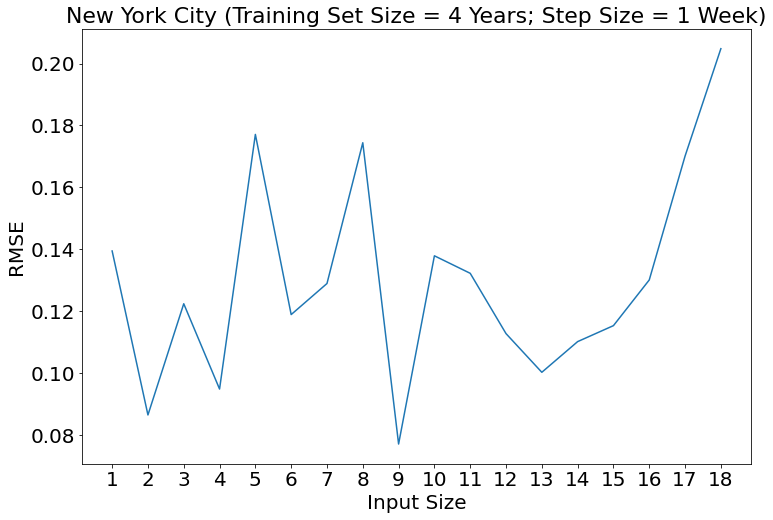

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

sns.lineplot(x=range(1, 19), y=input_values)
         
plt.title('New York City (Training Set Size = 4 Years; Step Size = 1 Week)', fontsize = 22)
plt.ylabel('RMSE', fontsize = 20)
plt.xticks(range(1, 19), fontsize=20)

plt.yticks(fontsize=20)
plt.xlabel('Input Size', fontsize = 20)


In [48]:
state_name = 'NY'

df_weekly_all = pd.read_csv("Zillow_Weekly_MedianSalesPrice_Raw.csv")
df_weekly_all = df_weekly_all[df_weekly_all.StateName == state_name]
df_weekly_all.drop(['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'RegionType'], axis=1, inplace=True)
df_weekly_all.head()
df_weekly_all = pd.melt(df_weekly_all.dropna(axis=1), var_name='Date', value_name='MedianSalesPrice')
df_weekly_all.Date = pd.to_datetime(df_weekly_all.Date)
min_index_2020 = df_weekly_all.loc[df_weekly_all.Date == df_weekly_all[df_weekly_all.Date.dt.year == 2020].Date.min()].index[0]
print ('Total Weeks: ' + str(df_weekly_all.shape[0]))
print ('Total Years of Data: ' + str(np.round(df_weekly_all.shape[0]/52, 2)))

# data prep

df_weekly_all.index = df_weekly_all.Date
df_weekly_all.drop('Date', axis=1, inplace=True)

n_input = 8
dataset = df_weekly_all

epochs = []
for i in range(10, 110, 10):
    n_input = 8
#     print (state_name, "year:", yr, "timestep:", time_step)
    train, test = split_dataset(dataset.values, 1, 4)
    scaler = MinMaxScaler()
    train = scaler.fit_transform(train.reshape(-1, train.shape[-1])).reshape(train.shape)
    test = scaler.transform(test.reshape(-1, test.shape[-1])).reshape(test.shape)
    #         print (train.shape, test.shape)
    score, scores = evaluate_model(train, test, n_input, 1, i, 200, 200)
    summarize_scores('lstm', score, scores)
    epochs.append(score)
    print (' ')


Total Weeks: 514
Total Years of Data: 9.88
lstm: [0.100] 0.1
 
lstm: [0.079] 0.1
 
lstm: [0.121] 0.1
 
lstm: [0.111] 0.1
 
lstm: [0.106] 0.1
 
lstm: [0.120] 0.1
 
lstm: [0.102] 0.1
 
lstm: [0.107] 0.1
 
lstm: [0.099] 0.1
 
lstm: [0.110] 0.1
 


Text(0.5, 0, 'Epochs')

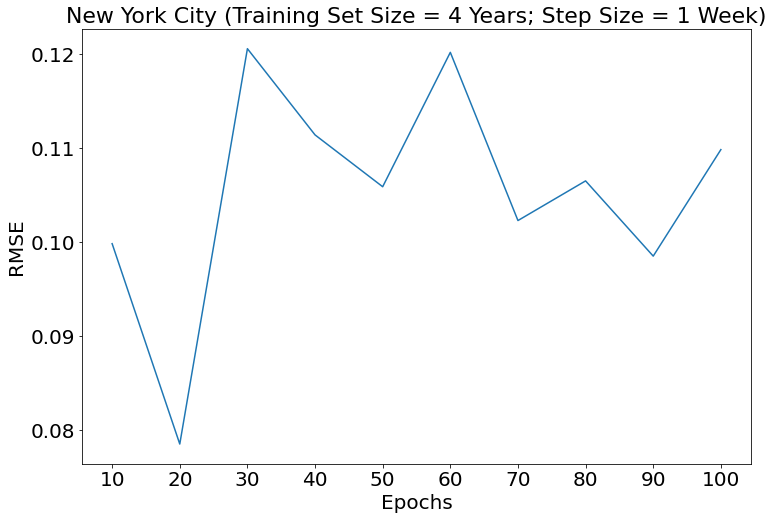

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

sns.lineplot(x=range(10, 110, 10), y=epochs)
         
plt.title('New York City (Training Set Size = 4 Years; Step Size = 1 Week)', fontsize = 22)
plt.ylabel('RMSE', fontsize = 20)
plt.xticks(range(10, 110, 10), fontsize=20)

plt.yticks(fontsize=20)
plt.xlabel('Epochs', fontsize = 20)

In [50]:
state_name = 'NY'

df_weekly_all = pd.read_csv("Zillow_Weekly_MedianSalesPrice_Raw.csv")
df_weekly_all = df_weekly_all[df_weekly_all.StateName == state_name]
df_weekly_all.drop(['Unnamed: 0', 'RegionID', 'SizeRank', 'RegionName', 'StateName', 'RegionType'], axis=1, inplace=True)
df_weekly_all.head()
df_weekly_all = pd.melt(df_weekly_all.dropna(axis=1), var_name='Date', value_name='MedianSalesPrice')
df_weekly_all.Date = pd.to_datetime(df_weekly_all.Date)
min_index_2020 = df_weekly_all.loc[df_weekly_all.Date == df_weekly_all[df_weekly_all.Date.dt.year == 2020].Date.min()].index[0]
print ('Total Weeks: ' + str(df_weekly_all.shape[0]))
print ('Total Years of Data: ' + str(np.round(df_weekly_all.shape[0]/52, 2)))

# data prep

df_weekly_all.index = df_weekly_all.Date
df_weekly_all.drop('Date', axis=1, inplace=True)

n_input = 8
dataset = df_weekly_all

encoder_decoder_sizes = []
for i in range(100, 1100, 100):
    n_input = 8
#     print (state_name, "year:", yr, "timestep:", time_step)
    train, test = split_dataset(dataset.values, 1, 4)
    scaler = MinMaxScaler()
    train = scaler.fit_transform(train.reshape(-1, train.shape[-1])).reshape(train.shape)
    test = scaler.transform(test.reshape(-1, test.shape[-1])).reshape(test.shape)
    #         print (train.shape, test.shape)
    score, scores = evaluate_model(train, test, n_input, 1, 20, i, i)
    summarize_scores('lstm', score, scores)
    encoder_decoder_sizes.append(score)
    print ('')


Total Weeks: 514
Total Years of Data: 9.88
lstm: [0.071] 0.1

lstm: [0.078] 0.1

lstm: [0.090] 0.1

lstm: [0.128] 0.1

lstm: [0.131] 0.1

lstm: [0.089] 0.1

lstm: [0.203] 0.2

lstm: [0.173] 0.2

lstm: [0.178] 0.2

lstm: [0.082] 0.1



Text(0.5, 0, 'Encoder/Decoder Unit Size')

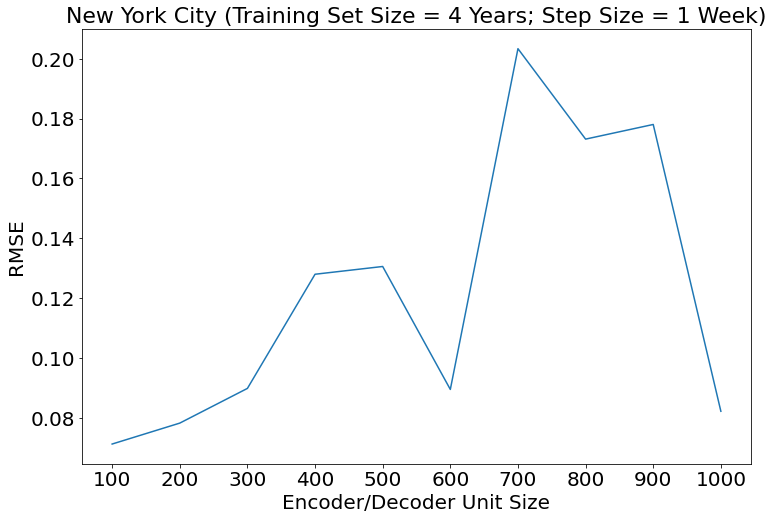

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

sns.lineplot(x=range(100, 1100, 100), y=encoder_decoder_sizes)
         
plt.title('New York City (Training Set Size = 4 Years; Step Size = 1 Week)', fontsize = 22)
plt.ylabel('RMSE', fontsize = 20)
plt.xticks(range(100, 1100, 100), fontsize=20)

plt.yticks(fontsize=20)
plt.xlabel('Encoder/Decoder Unit Size', fontsize = 20)

In [ ]:
fig, axs = plt.subplots()
sns.set(font_scale=1.5)
for key in per_timestep_dict.keys():
    sns.lineplot(x=range(1, 9), y=list(per_timestep_dict[key].values()), ax=axs, label=str(key) + ": Time Steps")
axs.set(xlabel='Training Size (Years)', ylabel='RMSE', title='New York City')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

per_year_dict = convert_dict_to_year_dict(per_timestep_dict)

fig, axs = plt.subplots()
sns.set(font_scale=1.5)
for key in per_year_dict.keys():
    sns.lineplot(x=range(1, 9), y=list(per_year_dict[key].values()), ax=axs, label=str(key) + ": Years Training")
axs.set(xlabel='Timesteps', ylabel='RMSE', title='New York City Median Sales Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()